# Name of the Student : Aagam Manish Shah

# USC ID Number : 8791018480

# 6.1 Supervised, Semi-Supervised, and Unsupervised Learning

In [1]:
import csv
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from tqdm import tqdm
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.cluster import SpectralClustering

In [2]:
warnings.filterwarnings("ignore")

## (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes. Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [3]:
input_data = pd.read_csv(r'wdbc.data',header = None)
input_data.columns = ['ID', 'Diagnosis', 'Mean_1','Mean_2','Mean_3','Mean_4','Mean_5','Mean_6','Mean_7','Mean_8','Mean_9',
                      'Mean_10','SE_1','SE_2','SE_3','SE_4','SE_5','SE_6','SE_7','SE_8','SE_9','SE_10','Worst_radius_1',
                      'Worst_radius_2','Worst_radius_3','Worst_radius_4','Worst_radius_5','Worst_radius_6','Worst_radius_7',
                     'Worst_radius_8','Worst_radius_9','Worst_radius_10'] 
input_data

,ID,Diagnosis,Mean_1,Mean_2,Mean_3,Mean_4,Mean_5,Mean_6,Mean_7,Mean_8,...,Worst_radius_1,Worst_radius_2,Worst_radius_3,Worst_radius_4,Worst_radius_5,Worst_radius_6,Worst_radius_7,Worst_radius_8,Worst_radius_9,Worst_radius_10
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
X = input_data.iloc[:,2:]
y = input_data.iloc[:,1]

In [5]:
X = X.to_numpy()

In [6]:
y = y.to_numpy()

In [7]:
def train_test_split_by_class_and_ratio(X, y, test_size=0.2, random_state=None, positive_class='B', negative_class='M'):
    
    if random_state:
        np.random.seed(random_state)
        shuffled_indexes = np.random.permutation(len(X))
        X = X[shuffled_indexes]
        y = y[shuffled_indexes]

    positive_class_size = len(X[y == positive_class])
    negative_class_size = len(X[y == negative_class])
    positive_test_set_size = round(positive_class_size * test_size)
    negative_test_set_size = round(negative_class_size * test_size)

    X_test_B = X[y == positive_class][:positive_test_set_size]
    X_test_M = X[y == negative_class][:negative_test_set_size]
    X_test = np.concatenate((X_test_B, X_test_M), axis=0)

    X_train_B = X[y == positive_class][positive_test_set_size:]
    X_train_M = X[y == negative_class][negative_test_set_size:]
    X_train = np.concatenate((X_train_B, X_train_M), axis=0)

    y_test_B = y[y == positive_class][:positive_test_set_size]
    y_test_M = y[y == negative_class][:negative_test_set_size]
    y_test = np.concatenate((y_test_B, y_test_M), axis=0)

    y_train_B = y[y == positive_class][positive_test_set_size:]
    y_train_M = y[y == negative_class][negative_test_set_size:]
    y_train = np.concatenate((y_train_B, y_train_M), axis=0)

    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X, y, test_size=0.2, random_state=2333)

print("-----------\"Before Data Split\"-------------")
print("The size of X_data is: ", X.shape)
print("The size of y_data is: ", y.shape)
print("-----------\"After Data Split\"-------------")
print("The size of X_train is: ", X_train.shape)
print("The size of X_test is: ", X_test.shape)
print("The size of y_train is: ", y_train.shape)
print("The size of y_test is: ", y_test.shape)

-----------"Before Data Split"-------------
The size of X_data is:  (569, 30)
The size of y_data is:  (569,)
-----------"After Data Split"-------------
The size of X_train is:  (456, 30)
The size of X_test is:  (113, 30)
The size of y_train is:  (456,)
The size of y_test is:  (113,)


In [9]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [10]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,13.64,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.01723,0.1353,0.05953,...,14.67,23.19,96.08,656.7,0.1089,0.1582,0.10500,0.08586,0.2346,0.08025
1,11.75,20.18,76.10,419.8,0.10890,0.11410,0.068430,0.03738,0.1993,0.06453,...,13.32,26.21,88.91,543.9,0.1358,0.1892,0.19560,0.07909,0.3168,0.07987
2,15.73,11.28,102.80,747.2,0.10430,0.12990,0.119100,0.06211,0.1784,0.06259,...,17.01,14.20,112.50,854.3,0.1541,0.2979,0.40040,0.14520,0.2557,0.08181
3,14.42,16.54,94.15,641.2,0.09751,0.11390,0.080070,0.04223,0.1912,0.06412,...,16.67,21.51,111.40,862.1,0.1294,0.3371,0.37550,0.14140,0.3053,0.08764
4,11.16,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,12.36,28.92,79.26,458.0,0.1282,0.1108,0.03582,0.04306,0.2976,0.07123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,15.49,19.97,102.40,744.7,0.11600,0.15620,0.189100,0.09113,0.1929,0.06744,...,21.20,29.41,142.10,1359.0,0.1681,0.3913,0.55530,0.21210,0.3187,0.10190
452,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.210700,0.09961,0.2310,0.06343,...,24.09,33.17,177.40,1651.0,0.1247,0.7444,0.72420,0.24930,0.4670,0.10380
453,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.09498,0.1582,0.05395,...,27.32,30.88,186.80,2398.0,0.1512,0.3150,0.53720,0.23880,0.2768,0.07615
454,15.34,14.26,102.50,704.4,0.10730,0.21350,0.207700,0.09756,0.2521,0.07032,...,18.07,19.08,125.10,980.9,0.1390,0.5954,0.63050,0.23930,0.4667,0.09946


In [11]:
y_train

,0
0,B
1,B
2,B
3,B
4,B
...,...
451,M
452,M
453,M
454,M


In [12]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,11.43,17.31,73.66,398.0,0.10920,0.09486,0.02031,0.01861,0.1645,0.06562,...,12.78,26.76,82.66,503.0,0.14130,0.17920,0.07708,0.06402,0.2584,0.08096
1,11.31,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,0.05667,...,12.33,23.84,78.00,466.7,0.12900,0.09148,0.14440,0.06961,0.2400,0.06641
2,13.90,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.01339,0.1813,0.05536,...,15.14,21.80,101.20,718.9,0.09384,0.20060,0.13840,0.06222,0.2679,0.07698
3,12.06,12.74,76.84,448.6,0.09311,0.05241,0.01972,0.01963,0.1590,0.05907,...,13.14,18.41,84.08,532.8,0.12750,0.12320,0.08636,0.07025,0.2514,0.07898
4,13.15,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,0.1822,0.06207,...,14.77,20.50,97.67,677.3,0.14780,0.22560,0.30090,0.09722,0.3849,0.08633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.07944,0.1927,0.06487,...,23.32,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390
109,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194,...,28.19,28.18,195.90,2384.0,0.12720,0.47250,0.58070,0.18410,0.2833,0.08858
110,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,0.06323,...,17.79,28.45,123.50,981.2,0.14150,0.46670,0.58620,0.20350,0.3054,0.09519
111,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525,...,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525


In [13]:
y_test

,0
0,B
1,B
2,B
3,B
4,B
...,...
108,M
109,M
110,M
111,M


## (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F-score, and AUC) that you obtain from each algorithm.

### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [14]:
def plot_roc(y_true, y_predict, title="ROC"):
    false_Positive_Rate, true_Positive_Rate, thresholds = roc_curve(y_true, y_predict)
    area = auc(false_Positive_Rate, true_Positive_Rate)
    plt.plot(false_Positive_Rate, true_Positive_Rate, color='red', label='AUC = ' + str(area))
    plt.plot([0, 1], [0, 1], linestyle='dotted')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:29<00:00,  1.00it/s]

-----------"Training Confusion Matrix"-------------
Predicted    0    1  All
True                    
0          286    0  286
1            1  169  170
All        287  169  456
-----------"Training Average Information"-------------
Average Accuracy Score:  0.9864035087719297
Average Precision:  0.9838810791888063
Average Recall Rate:  0.9946386946386947
Average F1_Score:  0.9892235716492777
Average AUC:  0.9835938571232689


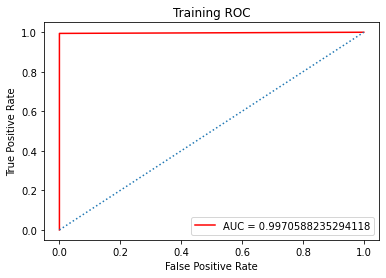

-----------"Testing Confusion Matrix"-------------
Predicted   0   1  All
True                  
0          68   3   71
1           0  42   42
All        68  45  113
-----------"Testing Average Information"-------------
Average Accuracy Score:  0.9666666666666667
Average Precision:  0.9649096432558024
Average Recall Rate:  0.9830985915492959
Average F1_Score:  0.9737248189037452
Avreage AUC:  0.9609937402190922


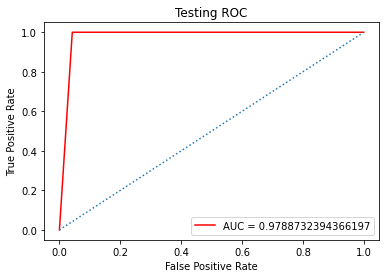

In [15]:
X = MinMaxScaler().fit(X).transform(X)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y = labelEncoder.transform(y)

parameters = {"C": np.linspace(1, 8, 10)}

train_Accuracy_List = list()
train_Precision_List = list()
train_Recall_List = list()
train_F_score_List = list()
train_AUC_List = list()

test_Accuracy_List = list()
test_Precision_List = list()
test_Recall_List = list()
test_F_score_List = list()
test_AUC_List = list()

train_Crosstab_List = dict()
test_Crosstab_List = dict()

y_train_List = dict()
y_test_List = dict()
y_train_predict_List = dict()
y_test_predict_List = dict()

for i in tqdm(range(30)):
    X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X, y, test_size=0.2,random_state=i, positive_class=0, 
                                                                           negative_class=1)
    y_train_List[i] = y_train
    y_test_List[i] = y_test

    linear_SVC = LinearSVC(penalty="l1", dual=False, max_iter=5000)
    grid_CV = GridSearchCV(linear_SVC, parameters, cv=5, n_jobs=-1)
    grid_CV.fit(X_train, y_train)

    best_Clf = grid_CV.best_estimator_
    y_train_predict = best_Clf.predict(X_train)
    y_test_predict = best_Clf.predict(X_test)

    y_train_predict_List[i] = y_train_predict
    y_test_predict_List[i] = y_test_predict

    train_Crosstab = pd.crosstab(y_train, y_train_predict, rownames=['True'], colnames=['Predicted'], margins=True)
    train_Crosstab_List[i] = train_Crosstab
    test_Crosstab = pd.crosstab(y_test, y_test_predict, rownames=['True'], colnames=['Predicted'], margins=True)
    test_Crosstab_List[i] = test_Crosstab
    
    # Training
    train_Accuracy_List.append(accuracy_score(y_train, y_train_predict))
    
    train_Precision, train_Recall, train_F_score, _ = score(y_train, y_train_predict, average='binary', pos_label=0)
    train_Precision_List.append(train_Precision)
    train_Recall_List.append(train_Recall)
    train_F_score_List.append(train_F_score)
    
    false_Positive_Rate, true_Positive_Rate, _ = roc_curve(y_train, y_train_predict)
    train_AUC = auc(false_Positive_Rate, true_Positive_Rate)
    train_AUC_List.append(train_AUC)
    
    # Testing
    test_Accuracy_List.append(accuracy_score(y_test, y_test_predict))
    
    test_Precision, test_Recall, test_F_score, _ = score(y_test, y_test_predict, average='binary', pos_label=0)
    test_Precision_List.append(test_Precision)
    test_Recall_List.append(test_Recall)
    test_F_score_List.append(test_F_score)

    false_Positive_Rate, true_Positive_Rate, _ = roc_curve(y_test, y_test_predict)
    test_AUC = auc(false_Positive_Rate, true_Positive_Rate)
    test_AUC_List.append(test_AUC)
    
# Training
Best_Precision_value = np.argmax(train_Precision_List)

print("-----------\"Training Confusion Matrix\"-------------")
print(train_Crosstab_List[Best_Precision_value])

print("-----------\"Training Average Information\"-------------")
print("Average Accuracy Score: ", np.average(train_Accuracy_List))
print("Average Precision: ", np.average(train_Precision_List))
print("Average Recall Rate: ", np.average(train_Recall_List))
print("Average F1_Score: ", np.average(train_F_score_List))
print("Average AUC: ", np.average(train_AUC_List))

Supervised_Train_dataframe = pd.DataFrame(data={'Algorithm': ['Supervised Train']})
Supervised_Train_dataframe['Average Accuracy'] = np.average(train_Accuracy_List)
Supervised_Train_dataframe['Average Precision'] = np.average(train_Precision_List)
Supervised_Train_dataframe['Average Recall'] = np.average(train_Recall_List)
Supervised_Train_dataframe['Average F1_Score'] = np.average(train_F_score_List)
Supervised_Train_dataframe['Average AUC'] = np.average(train_AUC_List)

infoDF = pd.DataFrame().append(Supervised_Train_dataframe)
plot_roc(y_train_List[Best_Precision_value], y_train_predict_List[Best_Precision_value], title="Training ROC")

#Testing
Best_Precision_value = np.argmax(test_Precision_List)

print("-----------\"Testing Confusion Matrix\"-------------")
print(test_Crosstab_List[Best_Precision_value])

print("-----------\"Testing Average Information\"-------------")
print("Average Accuracy Score: ", np.average(test_Accuracy_List))
print("Average Precision: ", np.average(test_Precision_List))
print("Average Recall Rate: ", np.average(test_Recall_List))
print("Average F1_Score: ", np.average(test_F_score_List))
print("Avreage AUC: ", np.average(test_AUC_List))

Supervised_Test_dataframe = pd.DataFrame(data={'Algorithm': ['Supervised Test']})
Supervised_Test_dataframe['Average Accuracy'] = np.average(test_Accuracy_List)
Supervised_Test_dataframe['Average Precision'] = np.average(test_Precision_List)
Supervised_Test_dataframe['Average Recall'] = np.average(test_Recall_List)
Supervised_Test_dataframe['Average F1_Score'] = np.average(test_F_score_List)
Supervised_Test_dataframe['Average AUC'] = np.average(test_AUC_List)

infoDF = infoDF.append(Supervised_Test_dataframe)
plot_roc(y_test_List[Best_Precision_value], y_test_predict_List[Best_Precision_value], title="Testing ROC")

### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

#### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [16]:
X = input_data.iloc[:,2:]
y = input_data.iloc[:,1]
X = MinMaxScaler().fit(X).transform(X)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y = labelEncoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X, y, test_size=0.2,random_state=2333, positive_class=0, 
                                                                       negative_class=1)

labeled_X, unlabeled_X, labeled_y, unlabeled_y = train_test_split_by_class_and_ratio(X_train, y_train, test_size=0.5,
                                                                                     random_state=666, positive_class=0,
                                                                                     negative_class=1)
parameters = {"C": np.linspace(0.01, 2, 10)}

linear_svc = LinearSVC(penalty="l1", dual=False, max_iter=10000)
grid_CV = GridSearchCV(linear_svc, parameters, cv=5, n_jobs=-1)
grid_CV.fit(labeled_X, labeled_y)

print("The test score  is:", grid_CV.score(X_test, y_test))

print("The best penalty parameter C is: ", grid_CV.best_params_)

The test score  is: 0.9734513274336283
The best penalty parameter C is:  {'C': 1.557777777777778}


#### B. Find the unlabeled data point that is the farthest to the decision boundary  of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the nal SVM on the test data and the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [17]:
def semi_supervised_learning_model(X_train, y_train, X_test, clf):
    X_test_shape = X_test.shape[0]
    for _ in range(X_test_shape):
        abs_Dist = np.absolute(bestClf.decision_function(X_test))
        index_Of_Max_Dist = np.argmax(abs_Dist)
        farthest_DataPoint = np.array(X_test[index_Of_Max_Dist]).reshape(1, 30)
        predicted_Result = clf.predict(farthest_DataPoint)

        X_test = np.delete(X_test, index_Of_Max_Dist, axis=0)
        X_train = np.append(X_train, farthest_DataPoint, axis=0)
        y_train = np.append(y_train, predicted_Result, axis=0)

        clf.fit(X_train, y_train)

    return clf

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:50<00:00,  7.70s/it]

-----------"Training Confusion Matrix"-------------
Predicted    0   1  All
True                   
0          142   1  143
1            0  85   85
All        142  86  228
-----------"Training Average Information"-------------
Average Accuracy Score:  0.9839181286549706
Average Precision:  0.9783464932248588
Average Recall Rate:  0.9965034965034965
Average F1_Score:  0.987317888453483
Average AUC:  0.9796242972713561


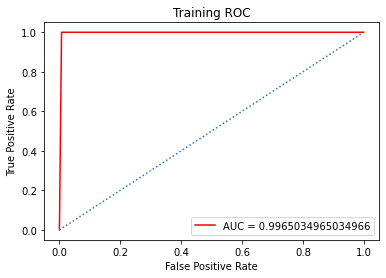

-----------"Testing Confusion Matrix"-------------
Predicted   0   1  All
True                  
0          69   2   71
1           0  42   42
All        69  44  113
-----------"Testing Average Information"-------------
Average Accuracy Score:  0.9749262536873159
Average Precision:  0.9717476477336825
Average Recall Rate:  0.9892018779342725
Average F1_Score:  0.9802810103365789
Avreage AUC:  0.9699977643639615


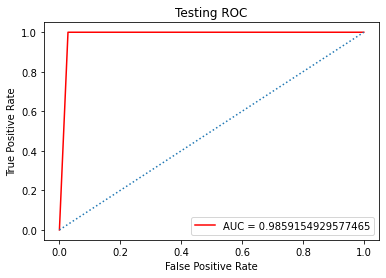

In [18]:
X = input_data.iloc[:,2:]
y = input_data.iloc[:,1]
X = MinMaxScaler().fit(X).transform(X)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y = labelEncoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X, y, test_size=0.2,random_state=2333, positive_class=0, 
                                                                       negative_class=1)

parameters = {"C": np.linspace(1, 5, 10)}

train_Accuracy_List = list()
train_Precision_List = list()
train_Recall_List = list()
train_F_score_List = list()
train_AUC_List = list()

test_Accuracy_List = list()
test_Precision_List = list()
test_Recall_List = list()
test_F_score_List = list()
test_AUC_List = list()

train_Crosstab_List = dict()
test_Crosstab_List = dict()

y_train_List = dict()
y_test_List = dict()
y_train_predict_List = dict()
y_test_predict_List = dict()
y_train_true_List = dict()

for i in tqdm(range(30)):
    labeled_X, unlabeled_X, labeled_y, unlabeled_y = train_test_split_by_class_and_ratio(X_train, y_train, test_size=0.5,
                                                                                         random_state=i, positive_class=0,
                                                                                         negative_class=1)
    linear_svc = LinearSVC(penalty="l1", dual=False, max_iter=5000)
    grid_CV = GridSearchCV(linear_svc, parameters, cv=5, n_jobs=-1)
    grid_CV.fit(labeled_X, labeled_y)
    bestClf = grid_CV.best_estimator_

    bestClf = semi_supervised_learning_model(labeled_X.copy(), labeled_y.copy(), unlabeled_X.copy(), bestClf)

    y_train_predict = bestClf.predict(labeled_X)
    y_test_predict = bestClf.predict(X_test)

    y_train_predict_List[i] = y_train_predict
    y_test_predict_List[i] = y_test_predict
    
    y_train_true_List[i] = labeled_y
    
    # Training
    train_Crosstab = pd.crosstab(labeled_y, y_train_predict, rownames=['True'], colnames=['Predicted'], margins=True)    
    train_Crosstab_List[i] = train_Crosstab
    # Testing
    test_Crosstab = pd.crosstab(y_test, y_test_predict, rownames=['True'], colnames=['Predicted'], margins=True)
    test_Crosstab_List[i] = test_Crosstab

    # Training
    train_Accuracy_List.append(accuracy_score(labeled_y, y_train_predict))
    train_Precision, train_Recall, train_F_score, _ = score(labeled_y, y_train_predict, average='binary', pos_label=0)
    train_Precision_List.append(train_Precision)
    train_Recall_List.append(train_Recall)
    train_F_score_List.append(train_F_score)
    
    false_Positive_Rate, true_Positive_Rate, _ = roc_curve(labeled_y, y_train_predict)
    train_AUC = auc(false_Positive_Rate, true_Positive_Rate)
    train_AUC_List.append(train_AUC)
    
    # Testing
    test_Accuracy_List.append(accuracy_score(y_test, y_test_predict))
    test_Precision, test_Recall, test_F_score, _ = score(y_test, y_test_predict, average='binary', pos_label=0)
    test_Precision_List.append(test_Precision)
    test_Recall_List.append(test_Recall)
    test_F_score_List.append(test_F_score)

    false_Positive_Rate, true_Positive_Rate, _ = roc_curve(y_test, y_test_predict)
    test_AUC = auc(false_Positive_Rate, true_Positive_Rate)
    test_AUC_List.append(test_AUC)

# Training
Best_Precision_value = np.argmax(train_Precision_List)

print("-----------\"Training Confusion Matrix\"-------------")
print(train_Crosstab_List[Best_Precision_value])

print("-----------\"Training Average Information\"-------------")
print("Average Accuracy Score: ", np.average(train_Accuracy_List))
print("Average Precision: ", np.average(train_Precision_List))
print("Average Recall Rate: ", np.average(train_Recall_List))
print("Average F1_Score: ", np.average(train_F_score_List))
print("Average AUC: ", np.average(train_AUC_List))

Semi_Supervised_Train_dataframe = pd.DataFrame(data={'Algorithm': ['Semi-Supervised Train']})
Semi_Supervised_Train_dataframe['Average Accuracy'] = np.average(train_Accuracy_List)
Semi_Supervised_Train_dataframe['Average Precision'] = np.average(train_Precision_List)
Semi_Supervised_Train_dataframe['Average Recall'] = np.average(train_Recall_List)
Semi_Supervised_Train_dataframe['Average F1_Score'] = np.average(train_F_score_List)
Semi_Supervised_Train_dataframe['Average AUC'] = np.average(train_AUC_List)

infoDF = infoDF.append(Semi_Supervised_Train_dataframe)
plot_roc(y_train_true_List[Best_Precision_value], y_train_predict_List[Best_Precision_value], title="Training ROC")

# Testing
Best_Precision_value = np.argmax(test_Precision_List)

print("-----------\"Testing Confusion Matrix\"-------------")
print(test_Crosstab_List[Best_Precision_value])

print("-----------\"Testing Average Information\"-------------")
print("Average Accuracy Score: ", np.average(test_Accuracy_List))
print("Average Precision: ", np.average(test_Precision_List))
print("Average Recall Rate: ", np.average(test_Recall_List))
print("Average F1_Score: ", np.average(test_F_score_List))
print("Avreage AUC: ", np.average(test_AUC_List))

Semi_Supervised_Test_dataframe = pd.DataFrame(data={'Algorithm': ['Semi-Supervised Test']})
Semi_Supervised_Test_dataframe['Average Accuracy'] = np.average(test_Accuracy_List)
Semi_Supervised_Test_dataframe['Average Precision'] = np.average(test_Precision_List)
Semi_Supervised_Test_dataframe['Average Recall'] = np.average(test_Recall_List)
Semi_Supervised_Test_dataframe['Average F1_Score'] = np.average(test_F_score_List)
Semi_Supervised_Test_dataframe['Average AUC'] = np.average(test_AUC_List)

infoDF = infoDF.append(Semi_Supervised_Test_dataframe)
plot_roc(y_test, y_test_predict_List[Best_Precision_value], title="Testing ROC")

### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

#### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

In [19]:
X = input_data.iloc[:,2:]
y = input_data.iloc[:,1]
X = MinMaxScaler().fit(X).transform(X)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y = labelEncoder.transform(y)

Accuracy_List = list()
Precision_List = list()
Recall_List = list()
F_score_List = list()
AUC_List = list()

for i in tqdm(range(30)):
    X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X, y, test_size=0.2,random_state=i, positive_class=0,
                                                                           negative_class=1)
    k_means_clf = KMeans(n_clusters=2, init='random', n_init=10)
    cluster_labels = k_means_clf.fit_predict(X_train)
    Accuracy_List.append(accuracy_score(y_train, cluster_labels))
    Precision, Recall, F_score, _ = score(y_train, cluster_labels, average='binary', pos_label=0)
    Precision_List.append(Precision)
    Recall_List.append(Recall)
    F_score_List.append(F_score)
    
    false_Positive_Rate, true_Positive_Rate, _ = roc_curve(y_train, cluster_labels)
    AUC_List.append(auc(false_Positive_Rate, true_Positive_Rate))

print("-----------\"STD Information\"-------------")
print("MAX Accuracy Score: ", max(Accuracy_List))
print("MAX Precision: ", max(Precision_List))
print("MAX Recall Rate: ", max(Recall_List))
print("MAX F1_Score: ", max(F_score_List))
print("MAX AUC: ", max(AUC_List))

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 50.34it/s]

-----------"STD Information"-------------
MAX Accuracy Score:  0.9407894736842105
MAX Precision:  0.93
MAX Recall Rate:  0.993006993006993
MAX F1_Score:  0.9544688026981449
MAX AUC:  0.9259975318798848


By running algorithm multiple times and alsousing ranndom seed we  can amke sure that the algorithm was not trapped in a local minimum.

#### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 56.29it/s]


-----------"Overall Average Information"-------------
Average Accuracy Score:  0.9280701754385968
Average Precision:  0.9146853554716695
Average Recall Rate:  0.9764568764568767
Average F1_Score:  0.944525055616172
Average AUC:  0.9115617715617716


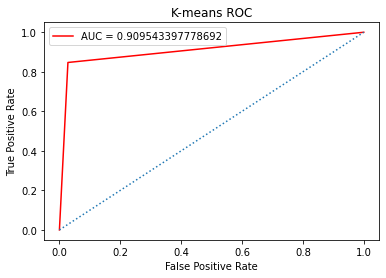

-----------"Confusion Matrix for One Run"-------------
Predicted    0    1  All
True                    
0          278    8  286
1           26  144  170
All        304  152  456


In [20]:
X = input_data.iloc[:,2:]
y = input_data.iloc[:,1]
X = MinMaxScaler().fit(X).transform(X)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y = labelEncoder.transform(y)

Accuracy_List = list()
Precision_List = list()
Recall_List = list()
F_score_List = list()
AUC_List = list()
y_predict = None
y_true = None

for i in tqdm(range(30)):
    X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X, y,test_size=0.2,random_state=i, positive_class=0,
                                                                           negative_class=1)
    k_means_clf = KMeans(n_clusters=2, init='random', n_init=10)
    cluster_labels = k_means_clf.fit_predict(X_train)
    
    index_Of_Positive_Dist = np.argsort(cdist(X_train, k_means_clf.cluster_centers_, 'euclidean')[:, 0], axis=0)[:30]
    index_Of_Negative_Dist = np.argsort(cdist(X_train, k_means_clf.cluster_centers_, 'euclidean')[:, 1], axis=0)[:30]

    y_train_positive_nearest_30 = y_train[index_Of_Positive_Dist]
    y_train_negative_nearest_30 = y_train[index_Of_Negative_Dist]
    positive_label = Counter(y_train_positive_nearest_30).most_common(1)[0][0]
    negative_label = Counter(y_train_negative_nearest_30).most_common(1)[0][0]
    
    majority_Polling = np.vectorize(lambda x: positive_label if x == 0 else negative_label)
    new_cluster_labels = majority_Polling(cluster_labels)
    
    y_predict = new_cluster_labels
    y_true = y_train
    
    Accuracy_List.append(accuracy_score(y_train, y_predict))
    Precision, Recall, F_score, _ = score(y_train, y_predict, average='binary', pos_label=0)
    Precision_List.append(Precision)
    Recall_List.append(Recall)
    F_score_List.append(F_score)
    false_Positive_Rate, true_Positive_Rate, _ = roc_curve(y_train, y_predict)
    AUC_List.append(auc(false_Positive_Rate, true_Positive_Rate))

print("-----------\"Overall Average Information\"-------------")
print("Average Accuracy Score: ", np.average(Accuracy_List))
print("Average Precision: ", np.average(Precision_List))
print("Average Recall Rate: ", np.average(Recall_List))
print("Average F1_Score: ", np.average(F_score_List))
print("Average AUC: ", np.average(AUC_List))

Unsupervised_Train_dataframe = pd.DataFrame(data={'Algorithm': ['Unsupervised Train']})
Unsupervised_Train_dataframe['Average Accuracy'] = np.average(Accuracy_List)
Unsupervised_Train_dataframe['Average Precision'] = np.average(Precision_List)
Unsupervised_Train_dataframe['Average Recall'] = np.average(Recall_List)
Unsupervised_Train_dataframe['Average F1_Score'] = np.average(F_score_List)
Unsupervised_Train_dataframe['Average AUC'] = np.average(AUC_List)

infoDF = infoDF.append(Unsupervised_Train_dataframe)
plot_roc(y_true, y_predict, title="K-means ROC")
print("-----------\"Confusion Matrix for One Run\"-------------")
print(pd.crosstab(y_true, y_predict, rownames=['True'], colnames=['Predicted'], margins=True))

#### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [21]:
def check_Result(labels):
    majority_Pred_Class = Counter(labels).most_common(1)[0][0]
    if majority_Pred_Class != 0:
        flip = np.vectorize(lambda x: 1 if x == 0 else 0)
        return flip(labels).tolist()
    return labels

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 79.58it/s]


-----------"Overall Average Information"-------------
Average Accuracy Score:  0.924778761061947
Average Precision:  0.9163324961320425
Average Recall Rate:  0.9699530516431925
Average F1_Score:  0.941946901188207
Average AUC:  0.9091828750279453


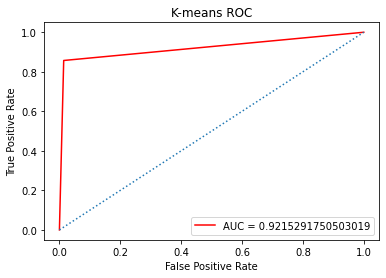

-----------"Confusion Matrix for One Run"-------------
Predicted   0   1  All
True                  
0          70   1   71
1           6  36   42
All        76  37  113


In [22]:
X = input_data.iloc[:,2:]
y = input_data.iloc[:,1]
X = MinMaxScaler().fit(X).transform(X)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y = labelEncoder.transform(y)

Accuracy_List = list()
Precision_List = list()
Recall_List = list()
F_score_List = list()
AUC_List = list()
y_test_predict = list()
y_test_true = None

for i in tqdm(range(30)):
    X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X, y, test_size=0.2,random_state=i, positive_class=0,
                                                                           negative_class=1)

    k_means_clf = KMeans(n_clusters=2, init='random', n_init=10)
    cluster_labels = k_means_clf.fit_predict(X_test)
    positive_Dist = cdist(X_test, k_means_clf.cluster_centers_, 'euclidean')[:, 0]
    negative_Dist = cdist(X_test, k_means_clf.cluster_centers_, 'euclidean')[:, 1]
    y_test_predict.clear()
    
    for index, pred_label in enumerate(cluster_labels):
        if pred_label == 0:
            y_test_predict.append(0 if abs(positive_Dist[index]) < abs(negative_Dist[index]) else 1)
        else:
            y_test_predict.append(1 if abs(positive_Dist[index]) > abs(negative_Dist[index]) else 0)
    
    y_test_predict = check_Result(y_test_predict)
    y_test_true = y_test
    
    Accuracy_List.append(accuracy_score(y_test, y_test_predict))
    Precision, Recall, F_score, _ = score(y_test, y_test_predict, average='binary', pos_label=0)
    Precision_List.append(Precision)
    Recall_List.append(Recall)
    F_score_List.append(F_score)
    false_Positive_Rate, true_Positive_Rate, _ = roc_curve(y_test, y_test_predict)
    AUC_List.append(auc(false_Positive_Rate, true_Positive_Rate))

print("-----------\"Overall Average Information\"-------------")
print("Average Accuracy Score: ", np.average(Accuracy_List))
print("Average Precision: ", np.average(Precision_List))
print("Average Recall Rate: ", np.average(Recall_List))
print("Average F1_Score: ", np.average(F_score_List))
print("Average AUC: ", np.average(AUC_List))

Unsupervised_Test_dataframe = pd.DataFrame(data={'Algorithm': ['Unsupervised Test']})
Unsupervised_Test_dataframe['Average Accuracy'] = np.average(Accuracy_List)
Unsupervised_Test_dataframe['Average Precision'] = np.average(Precision_List)
Unsupervised_Test_dataframe['Average Recall'] = np.average(Recall_List)
Unsupervised_Test_dataframe['Average F1_Score'] = np.average(F_score_List)
Unsupervised_Test_dataframe['Average AUC'] = np.average(AUC_List)

infoDF = infoDF.append(Unsupervised_Test_dataframe)
plot_roc(y_test_true, y_test_predict, title="K-means ROC")
print("-----------\"Confusion Matrix for One Run\"-------------")
print(pd.crosstab(y_test_true, np.reshape(y_test_predict, (-1,)), rownames=['True'], colnames=['Predicted'], margins=True))

### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit_predict method.

#### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

In [23]:
X = input_data.iloc[:,2:]
y = input_data.iloc[:,1]
X = MinMaxScaler().fit(X).transform(X)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y = labelEncoder.transform(y)

Accuracy_List = list()
Precision_List = list()
Recall_List = list()
F_score_List = list()
AUC_List = list()

for i in tqdm(range(30)):
    X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X, y, test_size=0.2,random_state=i,positive_class=0, 
                                                                           negative_class=1)
    
    spectral_clf = SpectralClustering(n_clusters=2, affinity="rbf", n_init=10, gamma=1)
    cluster_labels = spectral_clf.fit_predict(X_train)
    Accuracy_List.append(accuracy_score(y_train, cluster_labels))
    Precision, Recall, F_score, _ = score(y_train, cluster_labels, average='binary', pos_label=0)
    Precision_List.append(Precision)
    Recall_List.append(Recall)
    F_score_List.append(F_score)
    false_Positive_Rate, true_Positive_Rate, _ = roc_curve(y_train, cluster_labels)
    AUC_List.append(auc(false_Positive_Rate, true_Positive_Rate))

print("-----------\"Standard Information\"-------------")
print("Maximum Accuracy Score: ", max(Accuracy_List))
print("Maximum Precision: ", max(Precision_List))
print("Maximum Recall Rate: ", max(Recall_List))
print("Maximum F1 -Score: ", max(F_score_List))
print("Maximum AUC: ", max(AUC_List))

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 18.17it/s]

-----------"Standard Information"-------------
Maximum Accuracy Score:  0.8881578947368421
Maximum Precision:  0.8549848942598187
Maximum Recall Rate:  1.0
Maximum F1 -Score:  0.9173419773095625
Maximum AUC:  0.8535787741670096


#### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 18.94it/s]


-----------"Overall Average Information"-------------
Average Accuracy Score:  0.8602339181286549
Average Precision:  0.8219839460200201
Average Recall Rate:  0.9927738927738929
Average F1 -Score:  0.8992203321950625
Average AUC:  0.8150143973673385


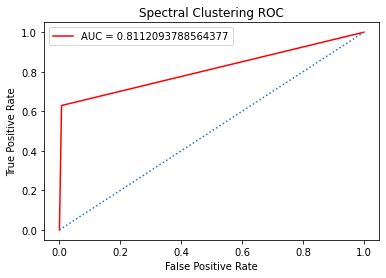

-----------"Confusion Matrix about One Run"-------------
Predicted    0    1  All
True                    
0          284    2  286
1           63  107  170
All        347  109  456


In [24]:
X = input_data.iloc[:,2:]
y = input_data.iloc[:,1]
X = MinMaxScaler().fit(X).transform(X)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y = labelEncoder.transform(y)

Accuracy_List = list()
Precision_List = list()
Recall_List = list()
F_score_List = list()
AUC_List = list()
y_train_predict = None
y_train_true = None

for i in tqdm(range(30)):
    X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X, y, test_size=0.2,random_state=i,positive_class=0,
                                                                           negative_class=1)

    spectral_clf = SpectralClustering(n_clusters=2, affinity="rbf", n_init=10, gamma=1)
    cluster_labels = spectral_clf.fit_predict(X_train)

    index_Of_Positive_Dist = np.argwhere(cluster_labels == 0).reshape(-1, )
    index_Of_Negative_Dist = np.argwhere(cluster_labels == 1).reshape(-1, )

    y_train_positive = y_train[index_Of_Positive_Dist]
    y_train_negative = y_train[index_Of_Negative_Dist]
    
    positive_label = Counter(y_train_positive).most_common(1)[0][0]
    negative_label = Counter(y_train_negative).most_common(1)[0][0]
    
    cluster_labels[index_Of_Positive_Dist] = positive_label
    cluster_labels[index_Of_Negative_Dist] = negative_label

    y_train_predict = cluster_labels
    y_train_true = y_train
    
    Accuracy_List.append(accuracy_score(y_train_true, y_train_predict))
    Precision, Recall, F_score, _ = score(y_train_true, y_train_predict, average='binary', pos_label=0)
    Precision_List.append(Precision)
    Recall_List.append(Recall)
    F_score_List.append(F_score)
    false_Positive_Rate, true_Positive_Rate, _ = roc_curve(y_train_true, y_train_predict)
    AUC_List.append(auc(false_Positive_Rate, true_Positive_Rate))

print("-----------\"Overall Average Information\"-------------")
print("Average Accuracy Score: ", np.average(Accuracy_List))
print("Average Precision: ", np.average(Precision_List))
print("Average Recall Rate: ", np.average(Recall_List))
print("Average F1 -Score: ", np.average(F_score_List))
print("Average AUC: ", np.average(AUC_List))

Spectral_Train_dataframe = pd.DataFrame(data={'Algorithm': ['Spectral Clustering Train']})
Spectral_Train_dataframe['Average Accuracy'] = np.average(Accuracy_List)
Spectral_Train_dataframe['Average Precision'] = np.average(Precision_List)
Spectral_Train_dataframe['Average Recall'] = np.average(Recall_List)
Spectral_Train_dataframe['Average F1_Score'] = np.average(F_score_List)
Spectral_Train_dataframe['Average AUC'] = np.average(AUC_List)

infoDF = infoDF.append(Spectral_Train_dataframe)
plot_roc(y_train_true, y_train_predict, title="Spectral Clustering ROC")
print("-----------\"Confusion Matrix about One Run\"-------------")
print(pd.crosstab(y_train_true, y_train_predict, rownames=['True'], colnames=['Predicted'], margins=True))

#### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 52.16it/s]


-----------"Overall Average Information"-------------
Average Accuracy Score:  0.8498525073746312
Average Precision:  0.8179073425956712
Average Recall Rate:  0.9896713615023477
Average F1_Score:  0.8940048081424009
Avreage AUC:  0.8015817124972056


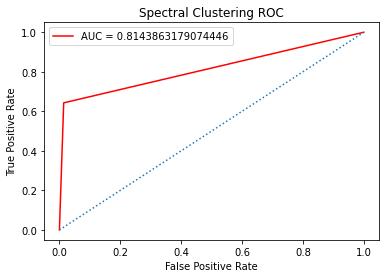

-----------"Confusion Matrix about One Run"-------------
Predicted   0   1  All
True                  
0          70   1   71
1          15  27   42
All        85  28  113


In [25]:
X = input_data.iloc[:,2:]
y = input_data.iloc[:,1]
X = MinMaxScaler().fit(X).transform(X)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y = labelEncoder.transform(y)

Accuracy_List = list()
Precision_List = list()
Recall_List = list()
F_score_List = list()
AUC_List = list()
y_test_predict = None
y_test_true = None

for i in tqdm(range(30)):
    X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X, y, test_size=0.2,random_state=i,positive_class=0,
                                                                           negative_class=1)
    
    spectral_clf = SpectralClustering(n_clusters=2, affinity="rbf", n_init=10, gamma=1)
    cluster_labels = spectral_clf.fit_predict(X_test)

    index_Of_Positive_Dist = np.argwhere(cluster_labels == 0).reshape(-1, )
    index_Of_Negative_Dist = np.argwhere(cluster_labels == 1).reshape(-1, )

    y_test_positive = y_test[index_Of_Positive_Dist]
    y_test_negative = y_test[index_Of_Negative_Dist]
    
    positive_label = Counter(y_test_positive).most_common(1)[0][0]
    negative_label = Counter(y_test_negative).most_common(1)[0][0]
    
    cluster_labels[index_Of_Positive_Dist] = positive_label
    cluster_labels[index_Of_Negative_Dist] = negative_label

    y_test_predict = cluster_labels
    y_test_true = y_test
    Precision, Recall, F_score, _ = score(y_test_true, y_test_predict, average='binary', pos_label=0)
    
    Accuracy_List.append(accuracy_score(y_test_true, y_test_predict))
    Precision_List.append(Precision)
    Recall_List.append(Recall)
    F_score_List.append(F_score)
    false_Positive_Rate, true_Positive_Rate, _ = roc_curve(y_test_true, y_test_predict)
    AUC_List.append(auc(false_Positive_Rate, true_Positive_Rate))
    
print("-----------\"Overall Average Information\"-------------")
print("Average Accuracy Score: ", np.average(Accuracy_List))
print("Average Precision: ", np.average(Precision_List))
print("Average Recall Rate: ", np.average(Recall_List))
print("Average F1_Score: ", np.average(F_score_List))
print("Avreage AUC: ", np.average(AUC_List))

Spectral_Test_dataframe = pd.DataFrame(data={'Algorithm': ['Spectral Clustering Test']})
Spectral_Test_dataframe['Average Accuracy'] = np.average(Accuracy_List)
Spectral_Test_dataframe['Average Precision'] = np.average(Precision_List)
Spectral_Test_dataframe['Average Recall'] = np.average(Recall_List)
Spectral_Test_dataframe['Average F1_Score'] = np.average(F_score_List)
Spectral_Test_dataframe['Average AUC'] = np.average(AUC_List)

infoDF = infoDF.append(Spectral_Test_dataframe)
plot_roc(y_test_true, y_test_predict, title="Spectral Clustering ROC")
print("-----------\"Confusion Matrix about One Run\"-------------")
print(pd.crosstab(y_test_true, y_test_predict, rownames=['True'], colnames=['Predicted'], margins=True))

### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

In [26]:
infoDF

,Algorithm,Average Accuracy,Average Precision,Average Recall,Average F1_Score,Average AUC
0,Supervised Train,0.986404,0.983881,0.994639,0.989224,0.983594
0,Supervised Test,0.966667,0.964910,0.983099,0.973725,0.960994
0,Semi-Supervised Train,0.983918,0.978346,0.996503,0.987318,0.979624
0,Semi-Supervised Test,0.974926,0.971748,0.989202,0.980281,0.969998
0,Unsupervised Train,0.928070,0.914685,0.976457,0.944525,0.911562
0,Unsupervised Test,0.924779,0.916332,0.969953,0.941947,0.909183
0,Spectral Clustering Train,0.860234,0.821984,0.992774,0.899220,0.815014
0,Spectral Clustering Test,0.849853,0.817907,0.989671,0.894005,0.801582


In this Binary Classification problem we can not simply tell how good the model will work just based on the accuracy score, specially when we have the skewed dataset. However, the dataset which we are using here is not skewed so as a result the average  precision as well as the average recall rate can be a more reliable evaluation criteria, for classifying that how many patients are correctly classified(predicted) and how many patients are incorrectly classified(predicted) by the algorithm.

From the summary of the scores given in the tabular form above we can see that the Supervised Learning performed well on the given dataset, while the Semi Supervised Learning model gave a good prediction. Also they have almost similar values for the average Precision and average Recall scores.

For the case of Unsupervised Learning model, it has high value for Recall Rate but a low Precision score which implies that the algorithm will tend to predict that most of the patients have cancer.

In the case of Spectral Clustering, the average Precision and Recall Rates are very low as comapred to the other algorithms. It performs really bad than the rest of the algorithms.

# 5.2 Active Learning Using Support Vector Machines

In [27]:
import random
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import cm

## (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [28]:
data = pd.read_csv(r'data_banknote_authentication.txt', header = None)
data.columns = ['Variance','Skewness','Curtosis','Entropy','Class']
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [29]:
X_data = data.iloc[:,0:4]
y_data = data.iloc[:,4]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.344, random_state=2333)

In [31]:
warnings.filterwarnings("ignore")

## (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [32]:
def verify_y_data(data):
    return True if len(Counter(data).keys()) == 2 else False

In [33]:
def linearStdSVC():
    return Pipeline([("svc", LinearSVC(penalty="l1", dual=False, max_iter=5000))])

def plot_multiple_dataset(x_data, Y_data, title="Multiple Plots"):
    plt.figure(figsize=(12, 4))
    length = len(Y_data)
    color = iter(cm.rainbow(np.linspace(0, 1, length)))
    for i in range(length):
        plt.plot(x_data, Y_data[i], marker='', color=next(color), linewidth=1, alpha=0.3)

    plt.xlabel('The Size Of Training Dataset')
    plt.ylabel('Test Error')
    plt.ylim([0, 0.05])
    plt.title(title)
    plt.show()

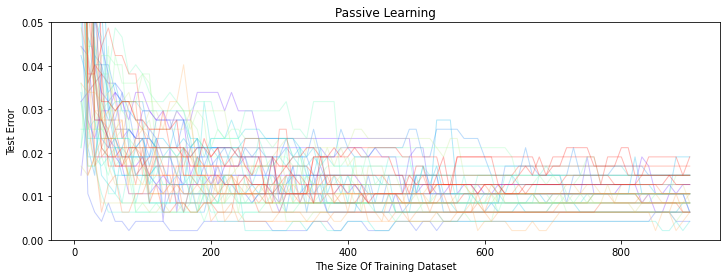

In [34]:
X_data = StandardScaler().fit(X_data).transform(X_data)

parameters = {"svc__C": np.linspace(1, 5, 10)}
Passive_Overall_Error_List = list()

for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.344, random_state=i)
    index_List_Length = len(X_train)
    index_List = np.arange(0, index_List_Length)
    X_train_pool = np.array([[]])
    y_train_pool = np.array([])
    temp_Error_List = list()
    
    for __ in range(90):
        indices = random.sample(index_List.tolist(), 10)
        while not verify_y_data(y_train.iloc[indices]):
            indices = random.sample(index_List.tolist(), 10)
        index_List = np.setdiff1d(index_List, np.array(indices))
        
        X_train_pool = np.append(X_train_pool, X_train[indices]).reshape(-1, 4)
        y_train_pool = np.append(y_train_pool, y_train.iloc[indices]).reshape(-1, )
        
        linear_standard_scv = linearStdSVC()
        cv = 10 if len(y_train_pool) > 10 else 5
        grid_CV = GridSearchCV(linear_standard_scv, parameters, cv=cv, n_jobs=-1, scoring='accuracy')
        grid_CV.fit(X_train_pool, y_train_pool)
        temp_Error_List.append(1 - grid_CV.score(X_test, y_test))

    Passive_Overall_Error_List.append(temp_Error_List)

plot_multiple_dataset(np.arange(10, 901, 10).tolist(), Passive_Overall_Error_List, title="Passive Learning")

### ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

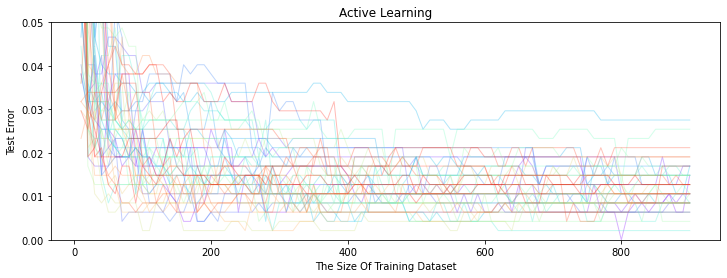

In [35]:
X_data = data.iloc[:,0:4]
y_data = data.iloc[:,4]

X_data = StandardScaler().fit(X_data).transform(X_data)

parameters = {"svc__C": np.linspace(1, 5, 10)}
Active_Overall_Error_List = list()
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.344, random_state=i)
    index_List_Length = len(X_train)
    index_List = np.arange(0, index_List_Length)
    X_train_pool = np.array([[]])
    y_train_pool = np.array([])
    temp_Error_List = list()
    
    indices = random.sample(index_List.tolist(), 10)
    while not verify_y_data(y_train.iloc[indices]):
        indices = random.sample(index_List.tolist(), 10)
    index_List = np.setdiff1d(index_List, np.array(indices))
    
    X_train_pool = np.append(X_train_pool, X_train[indices]).reshape(-1, 4)
    y_train_pool = np.append(y_train_pool, y_train.iloc[indices]).reshape(-1, )
    
    linear_standard_scv = linearStdSVC()
    grid_CV = GridSearchCV(linear_standard_scv, parameters, cv=5, n_jobs=-1, scoring='accuracy')
    grid_CV.fit(X_train_pool, y_train_pool)
    temp_Error_List.append(1 - grid_CV.score(X_test, y_test))
    
    for __ in range(89):
        remaining_Data = X_train[index_List]
        distances = grid_CV.best_estimator_.decision_function(remaining_Data).reshape(-1, 1)
        remainingData = np.hstack((remaining_Data, abs(distances)))
        
        closet_Indices = remaining_Data[:, 3].argsort()[:10]
        initial_10_closest_X_datapoints = X_train[closet_Indices]
        initial_10_closest_y_datapoints = y_train.iloc[closet_Indices]
        index_List = np.setdiff1d(index_List, np.array(closet_Indices))
        
        X_train_pool = np.append(X_train_pool, initial_10_closest_X_datapoints).reshape(-1, 4)
        y_train_pool = np.append(y_train_pool, initial_10_closest_y_datapoints).reshape(-1, )

        linear_standard_scv = linearStdSVC()
        grid_CV = GridSearchCV(linear_standard_scv, parameters, cv=10, n_jobs=-1, scoring='accuracy')
        grid_CV.fit(X_train_pool, y_train_pool)
        temp_Error_List.append(1 - grid_CV.score(X_test, y_test))
    
    Active_Overall_Error_List.append(temp_Error_List)
    
plot_multiple_dataset(np.arange(10, 901, 10).tolist(), Active_Overall_Error_List, title="Active Learning")

## (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

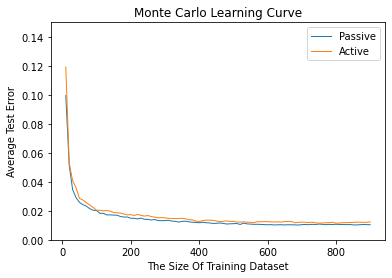

In [36]:
average_Passive_Error_List = np.average(np.array(Passive_Overall_Error_List), axis=0)
average_Active_Error_List = np.average(np.array(Active_Overall_Error_List), axis=0)
plt.plot(np.arange(10, 901, 10), average_Passive_Error_List, marker='', linewidth=1, label="Passive")
plt.plot(np.arange(10, 901, 10), average_Active_Error_List, marker='', linewidth=1, label="Active")
plt.xlabel('The Size Of Training Dataset')
plt.ylabel('Average Test Error')
plt.ylim([0, 0.15])
plt.title("Monte Carlo Learning Curve")
plt.legend()
plt.show()

Conclusion: As we can see from the Active as well as the Passive Learning that the average test error drops rapidly initially and then it becomes stable after a certain point as the number of the trainning instances increases. Also we can observe that the slope of the Active Learning is smoother than the Passive Learning. As we can obeserve from the curve that the test error obtained from the Passive Learning is less than the test error obtained from the Active Learning, hence the Passive Learning performs better than the Active Learning.